Figures for lowfc from brain_simulation_nodtu_lowfc/mode=gc_bias/post_type=gibbs_nrep=100_t=100/tree_analysis_updated_sim/compute_met.ipynb

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
load("dfA.RData") ## Generated from http://localhost:8888/notebooks/brain_simulation_nodtu/mode%3Dgc_bias/post_type%3Dgibbs_nrep%3D100_tf%3D100/tree_analysis_updated_sim/compute_met_updated.ipynb

In [2]:
dfA
dfA <- dfA %>% 
    mutate(keep_0.01=ifelse(FDR_0.01_FDR <= 0.01, T, F)) %>%
    mutate(keep_0.05=ifelse(FDR_0.05_FDR <= 0.05, T, F)) %>%
    mutate(keep_0.10=ifelse(FDR_0.10_FDR <= 0.10, T, F))
dfA[["Method"]] <- c("Txps", "treeDE", "treeclimbR(N)", "treeclimbR(L)", "Terminus", "Genes") 
dfA

Method,FDR_0.01_FDR,FDR_0.05_FDR,FDR_0.10_FDR,FDR_0.01_TPR,FDR_0.05_TPR,FDR_0.10_TPR
<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
Txps,0.007,0.043,0.081,0.209,0.337,0.406
treeDEFDR_OL,0.007,0.048,0.088,0.244,0.382,0.458
treeClimbR,0.007,0.042,0.083,0.2,0.314,0.383
treeClimbRO,0.066,0.111,0.196,0.246,0.388,0.505
term,0.007,0.04,0.075,0.218,0.342,0.407
genes,0.007,0.042,0.075,0.334,0.448,0.509


Method,FDR_0.01_FDR,FDR_0.05_FDR,FDR_0.10_FDR,FDR_0.01_TPR,FDR_0.05_TPR,FDR_0.10_TPR,keep_0.01,keep_0.05,keep_0.10
<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<lgl>,<lgl>,<lgl>
Txps,0.007,0.043,0.081,0.209,0.337,0.406,TRUE,TRUE,TRUE
treeDE,0.007,0.048,0.088,0.244,0.382,0.458,TRUE,TRUE,TRUE
treeclimbR(N),0.007,0.042,0.083,0.2,0.314,0.383,TRUE,TRUE,TRUE
treeclimbR(L),0.066,0.111,0.196,0.246,0.388,0.505,FALSE,FALSE,FALSE
Terminus,0.007,0.04,0.075,0.218,0.342,0.407,TRUE,TRUE,TRUE
Genes,0.007,0.042,0.075,0.334,0.448,0.509,TRUE,TRUE,TRUE


In [5]:
dfA

Method,FDR_0.01_FDR,FDR_0.05_FDR,FDR_0.10_FDR,FDR_0.01_TPR,FDR_0.05_TPR,FDR_0.10_TPR,keep_0.01,keep_0.05,keep_0.10
<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<lgl>,<lgl>,<lgl>
Txps,0.007,0.043,0.081,0.209,0.337,0.406,TRUE,TRUE,TRUE
treeDE,0.007,0.048,0.088,0.244,0.382,0.458,TRUE,TRUE,TRUE
treeclimbR(N),0.007,0.042,0.083,0.2,0.314,0.383,TRUE,TRUE,TRUE
treeclimbR(L),0.066,0.111,0.196,0.246,0.388,0.505,FALSE,FALSE,FALSE
Terminus,0.007,0.04,0.075,0.218,0.342,0.407,TRUE,TRUE,TRUE
Genes,0.007,0.042,0.075,0.334,0.448,0.509,TRUE,TRUE,TRUE


In [3]:
df1 <- dfA %>% 
  pivot_longer(starts_with("FDR"),
  names_to = c("fdr", ".value"),
  names_pattern = "(.+)_(.+)"
  ) %>% select(fdr, FDR, TPR, Method)
df2 <- dfA %>% pivot_longer(starts_with("keep"), 
                    names_to = c(".value", "fdr"),
                    names_sep="_") %>% select(keep)
dfC <- bind_cols(df1, df2)
dfC$FDR <- unlist(dfC$FDR)
dfC$TPR <- unlist(dfC$TPR)
dfC

fdr,FDR,TPR,Method,keep
<chr>,<dbl>,<dbl>,<chr>,<lgl>
FDR_0.01,0.007,0.209,Txps,TRUE
FDR_0.05,0.043,0.337,Txps,TRUE
FDR_0.10,0.081,0.406,Txps,TRUE
FDR_0.01,0.007,0.244,treeDE,TRUE
FDR_0.05,0.048,0.382,treeDE,TRUE
FDR_0.10,0.088,0.458,treeDE,TRUE
FDR_0.01,0.007,0.200,treeclimbR(N),TRUE
FDR_0.05,0.042,0.314,treeclimbR(N),TRUE
FDR_0.10,0.083,0.383,treeclimbR(N),TRUE


In [5]:
size <- 24
pBrSimLow <- ggplot(dfC, aes(x = FDR, y = TPR, 
                             color = Method,
                             fill = ifelse(keep, Method, NA))) + 
                geom_point(size=5,shape=21) + 
                scale_fill_discrete(na.value = "transparent") +
                geom_line() +
                theme_bw() +
                geom_vline(xintercept = c(0.01, 0.05, 0.1), linetype = "dashed") +
                ggtitle("BrSimLow Dataset") +
                theme(axis.title = element_text(size = size),
                plot.title = element_text(size = size + 1, hjust=0.5),
                axis.text = element_text(size = size),
                legend.text = element_text(size = size),
                legend.title = element_text(size = size),
                legend.position = "bottom") +
                guides(fill = "none")

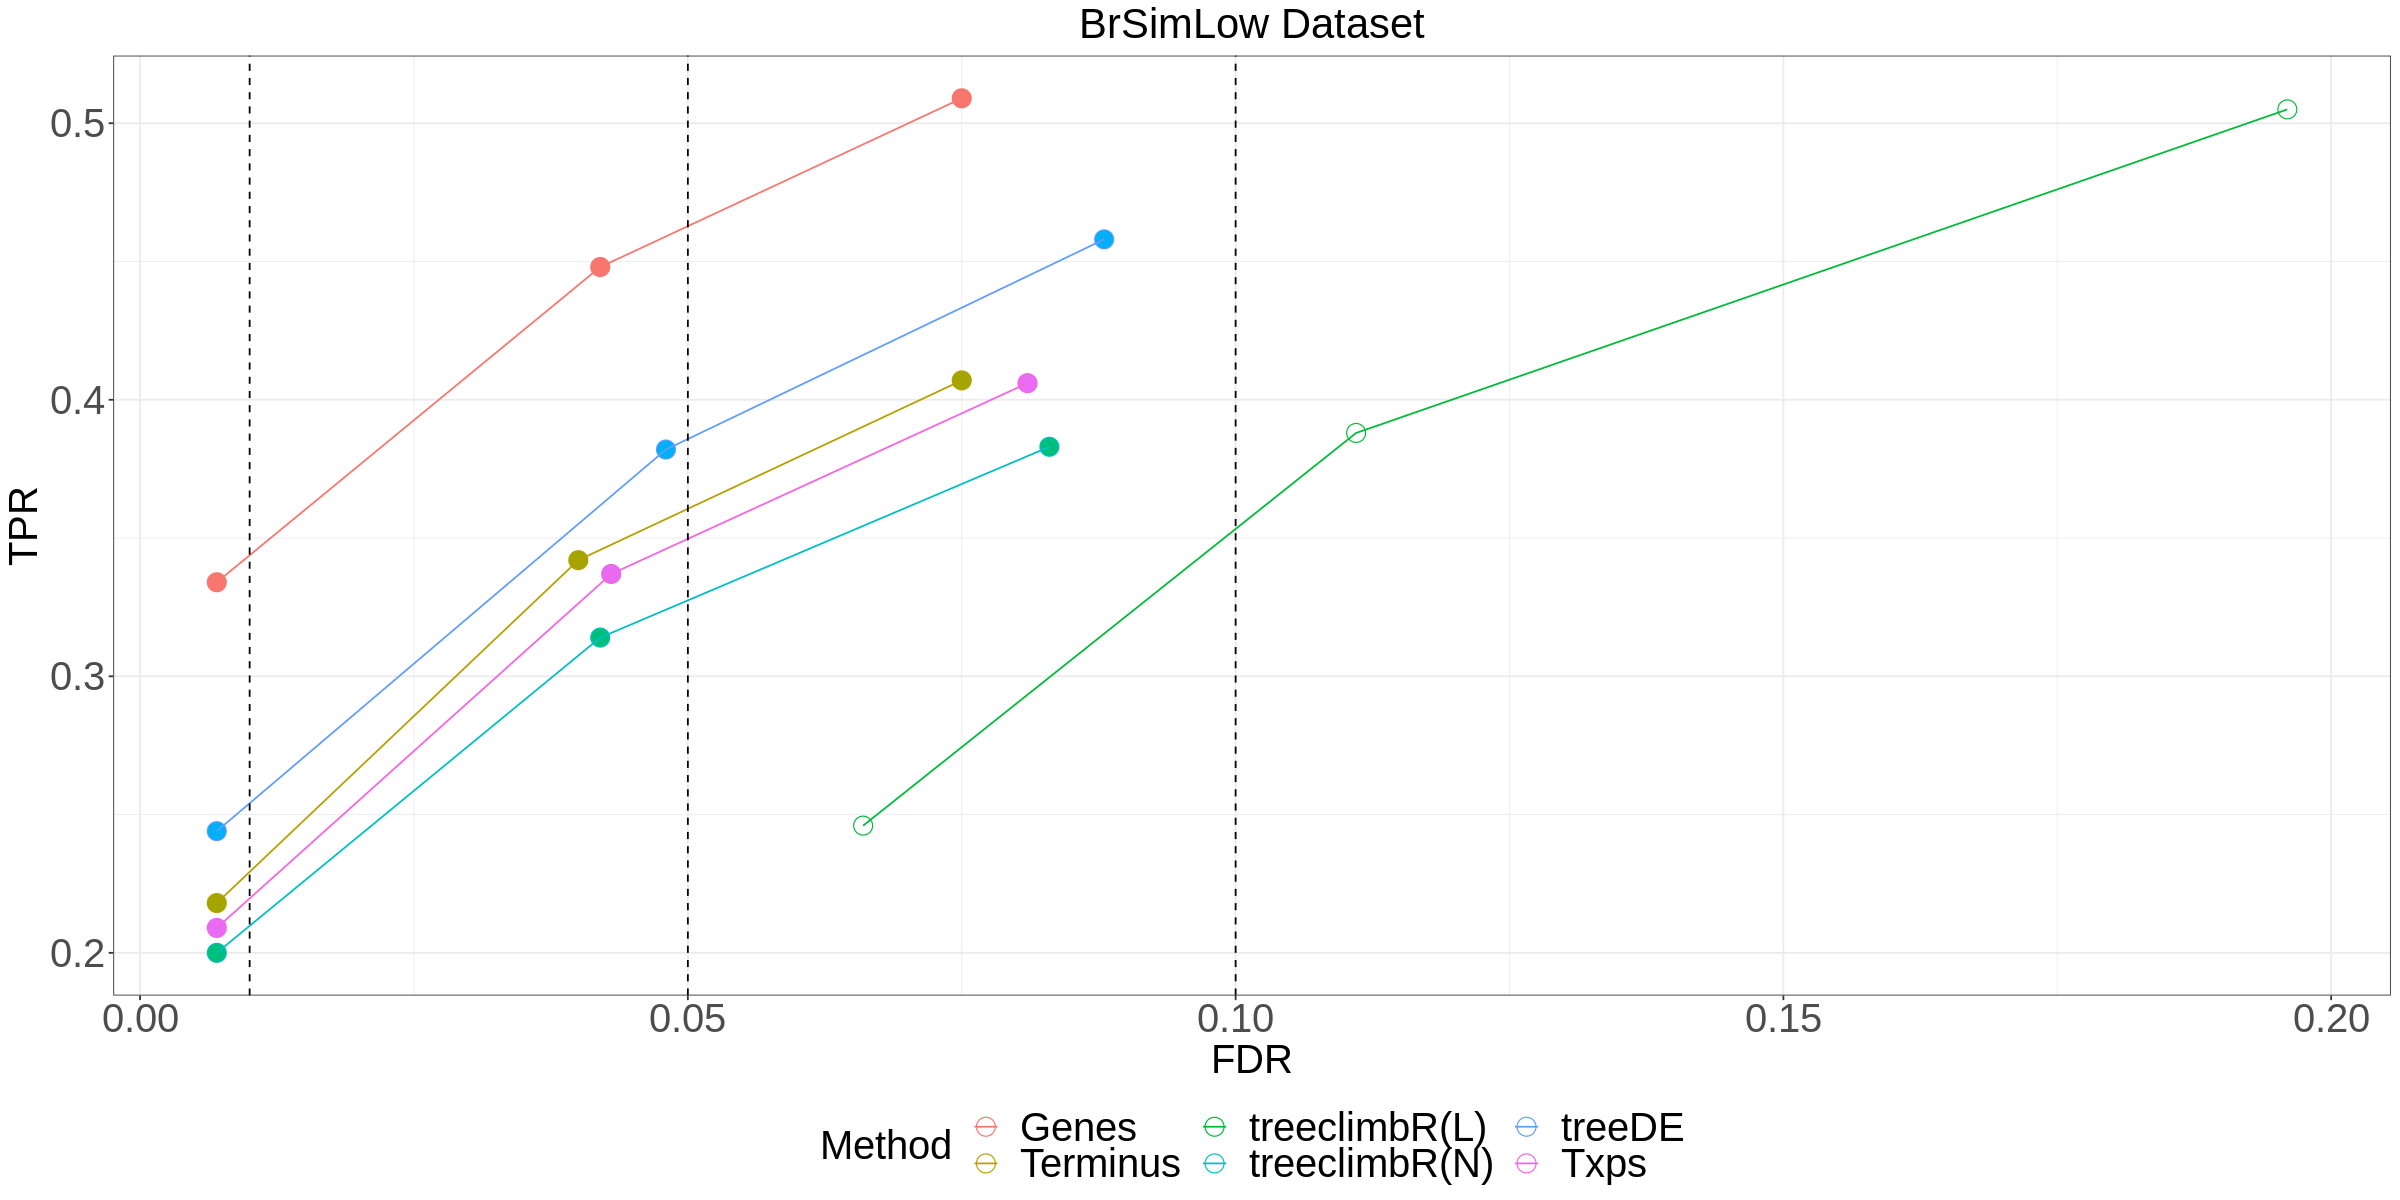

In [6]:
options(repr.plot.width=20, repr.plot.height=10)
pBrSimLow

#### BrSimNorm

In [15]:
load("../brain_sim_nodtu/dfA.RData")
dfA <- dfA %>% 
    mutate(keep_0.01=ifelse(FDR_0.01_FDR <= 0.01, T, F)) %>%
    mutate(keep_0.05=ifelse(FDR_0.05_FDR <= 0.05, T, F)) %>%
    mutate(keep_0.10=ifelse(FDR_0.10_FDR <= 0.10, T, F))
dfA[["Method"]] <- c("Txps", "treeDE", "treeclimbR(N)", "treeclimbR(L)", "Terminus", "Genes") 

In [16]:
df1 <- dfA %>% 
  pivot_longer(starts_with("FDR"),
  names_to = c("fdr", ".value"),
  names_pattern = "(.+)_(.+)"
  ) %>% select(fdr, FDR, TPR, Method)
df2 <- dfA %>% pivot_longer(starts_with("keep"), 
                    names_to = c(".value", "fdr"),
                    names_sep="_") %>% select(keep)
dfC <- bind_cols(df1, df2)
dfC$FDR <- unlist(dfC$FDR)
dfC$TPR <- unlist(dfC$TPR)

In [32]:
size <- 24
pBrSimNorm <- ggplot(dfC, aes(x = FDR, y = TPR, 
                             color = Method                            
                             )) + 
                geom_point(size=5,shape=21, aes(fill = ifelse(keep, Method, NA))) + 
                scale_fill_discrete(na.value = "transparent") +
                geom_line() +
                theme_bw() +
                geom_vline(xintercept = c(0.01, 0.05, 0.1), linetype = "dashed") +
                ggtitle("BrSimNorm Dataset") +
                theme(axis.title = element_text(size = size),
                plot.title = element_text(size = size + 1, hjust=0.5),
                axis.text = element_text(size = size),
                legend.text = element_text(size = size),
                legend.title = element_text(size = size),
                legend.position = "bottom") +
                guides(fill = "none")

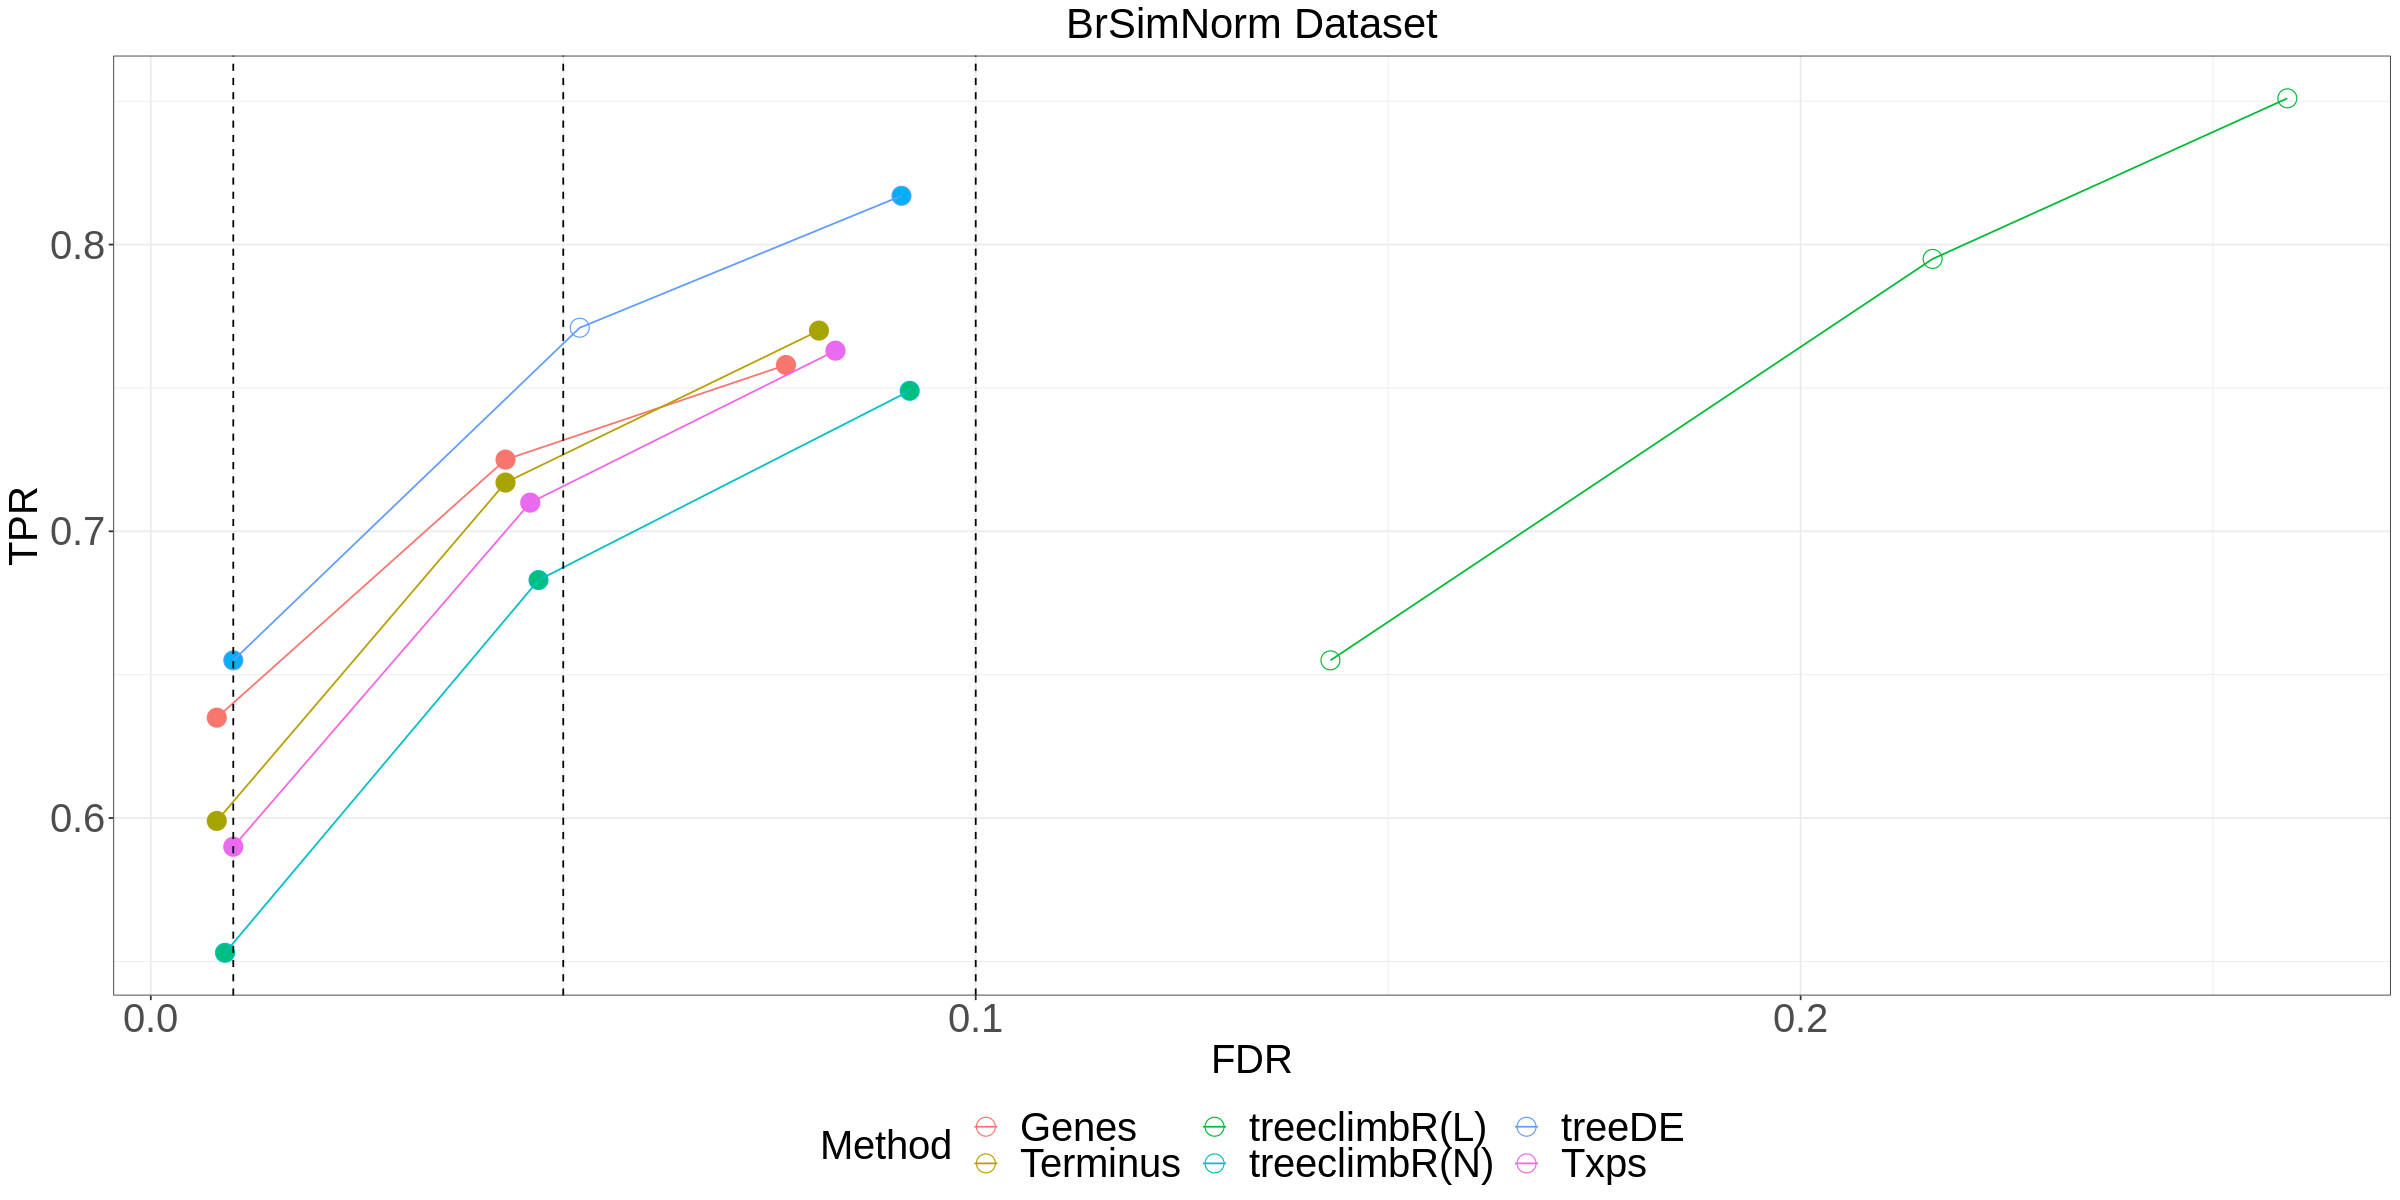

In [33]:
pBrSimNorm

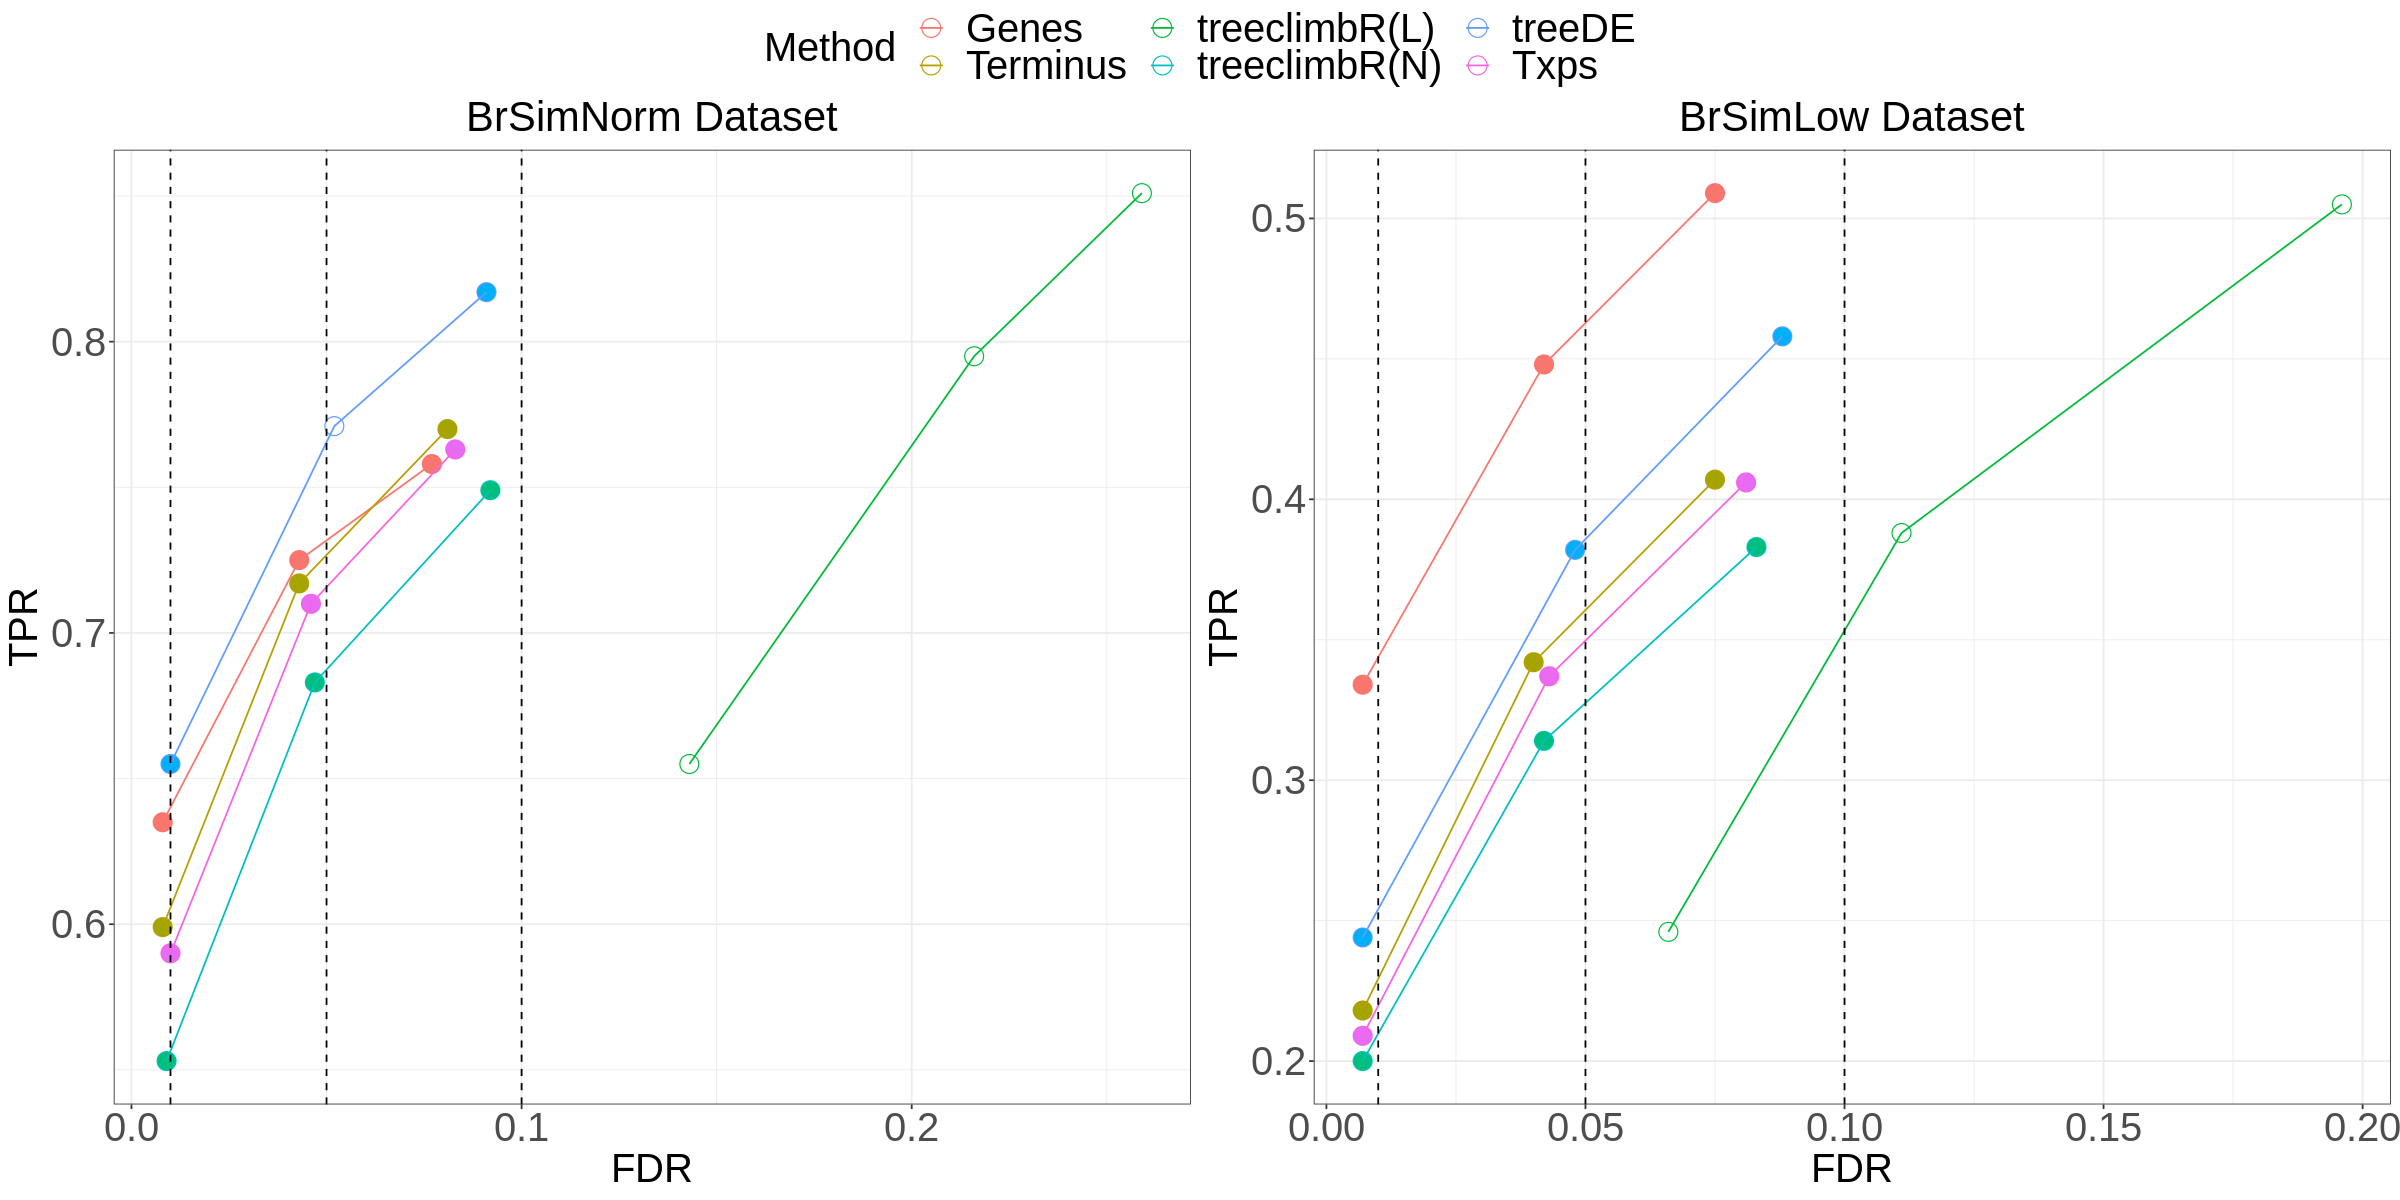

In [34]:
options(repr.plot.width=20, repr.plot.height=10)
suppressPackageStartupMessages(library(ggpubr))
ggarrange(pBrSimNorm, pBrSimLow, common.legend = TRUE)

In [19]:
dfC

fdr,FDR,TPR,Method,keep
<chr>,<dbl>,<dbl>,<chr>,<lgl>
FDR_0.01,0.010,0.590,Txps,TRUE
FDR_0.05,0.046,0.710,Txps,TRUE
FDR_0.10,0.083,0.763,Txps,TRUE
FDR_0.01,0.010,0.655,treeDE,TRUE
FDR_0.05,0.052,0.771,treeDE,FALSE
FDR_0.10,0.091,0.817,treeDE,TRUE
FDR_0.01,0.009,0.553,treeclimbR(N),TRUE
FDR_0.05,0.047,0.683,treeclimbR(N),TRUE
FDR_0.10,0.092,0.749,treeclimbR(N),TRUE
